# <font color='red'>STOCK MARKET IS VERY RISKY UNTIL YOU DO IT PROPERLY. PLEASE DO NOT TAKE TRADES JUST BECAUSE THIS TOOL GIVES YOU THE NAME. APPLY YOUR OWN LEARNINGS, CREATE YOUR OWN STRATEGY, ASSESS RISK & TRADE THE PLAN.</font>

# Imports, Defaults and Initializations
Clicking on the below cell is mandatory. Click on the cell below and press `Shift + Enter`. To run any cell, use the same keyboard shortcut.

In [1]:
# import backtrader
from helpers.datahandler import *
from helpers.investing import *
from helpers.journal_handler import *
from helpers.intraday import *
from helpers.nse_data import *
from helpers.backtest import *
from helpers.FnO import analyse_open_interest, get_next_expiry_date


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

In = Investing(check_fresh = True) # Investing or Swing trading analysis
Intra = IntraDay() # Intraday strategies and analysis
NSE = NSEData() # Get NSE Live data
MS = MarketSentiment() # Get Live Market Sentiment TICK, TRIN and 52W high/ low stocks
BT = Backtest()
ISS  = IntradayStockSelection() # Few of the Intraday Stock Selection methods. Not methods, but just a few things like stats of Move, Range etc

# In.update_new_listings() # Good to run once in a while say after every 1 month
# In.update_fresh_nifty_indices()
# In.update_FnO() # Future and Options List

Checking Fresh Data.....


# [Journal](https://drive.google.com/file/d/1JipUU6Im1YVKSdufw4VHitwS010nFigL/view)
Make a journal in Google Drive for each trade you take to analyse. **It is a not so simple process and need to connect with Google API so if you're not comfortable with it, just skip it**

In [5]:
private_key = join(expanduser('~'),'Documents','client_secret.json') # Personal for each user. Mine is stored in /home/Documents
JH = JournalHandler(private_key)

journal = JH.get_journal('Finance Journal') # My Google Sheet jornam has name "Finance Journal"

JH.total_pl(journal) # total Profit and Loss up until now

--------------------------------------------------------------------------- 

--------------------------------------------------------------------------- 



-1693.15

# [Swing  Trading Strategies](https://www.investopedia.com/terms/s/swingtrading.asp)
## Tweak parameters by reading the Docstring
## Basic Details
Basic Details about stocks such as Momentum, Ichimoku, 1-2-3 candles pattern etc

In [4]:
budget = 40000

df = In.get_recent_info(nifty = 500, **{'mvs':[20,50,100,200]})
df.head(2) # show first 2 values

/home/admin1/anaconda3/envs/finance/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/admin1/anaconda3/envs/finance/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Date,Name,LTP,Index,CCI Signal,RSI Signal,MACD Signal,Over 20-SMA,Over 50-SMA,Over 100-SMA,Over 200-SMA,Momentum ADX,Ichi Count,1 Candle,2 Candles,3 Candles
0,2021-10-11,3MINDIA,25720.0,Nifty 500,No Signal,No Signal,No Signal,True,True,True,True,25.271955,2,Green Doji,Unknown,Unknown
1,2021-10-11,ABB,1830.6,Nifty 500,No Signal,No Signal,No Signal,False,True,True,True,19.421299,1,Unknown Red,Unknown,Unknown


## Breakout
Stocks that might breakout. Includes only those stocks which are above 50 days SMA, have atleast `n` number of touches within the `p%` of the recent candle. Just look at these stocks manually. Change the parameters to control the number of stocks to scan.

In [2]:
In.tight_consolidation_stocks(stocks = 'nifty_500', diff = 0.007, min_count = 5, lookback_period = 10) # There should be atleast 5 candles touching the +- 0.75% of the line within 7 days

{'GODREJIND': 8,
 'RATNAMANI': 8,
 'RAJESHEXPO': 7,
 'BHARTIARTL': 6,
 '3MINDIA': 6,
 'INOXLEISUR': 6,
 'TATAMOTORS': 5,
 'RADICO': 5,
 'IOC': 5,
 'UCOBANK': 5,
 'HINDPETRO': 5,
 'DLF': 5,
 'ORIENTELEC': 5,
 'KSB': 5,
 'ANURAS': 5,
 'BAJAJHLDNG': 5}

## 44-SMA 
If you find a `Green` candle taking support on 44 days `Simple Moving Average` line and stock is in uptrend, you can take the trade and set Risk to Reward ratio as 1:2

In [6]:
budget = 40000 # Total Budget
risk = 400 # Risk per trade
df = In.show_full_stats(budget = budget,risk=risk, diff = 150, nifty='nifty_200') # Show only stocks undder your budget and  whose recent candle's lowest is not more than 151 rupees above the moving average line
df[(df['RSI Value'] < 70) & (df['CCI Value'] < 200)]

/home/admin1/anaconda3/envs/finance/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/admin1/anaconda3/envs/finance/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
/home/admin1/Desktop/ML Study/Finance/helpers/investing.py:196: UserWarning: Don't be greedy with risk to reward ratio of 2.5. Stick to system
  warnings.warn(f"Don't be greedy with risk to reward ratio of {risk_to_reward_ratio}. Stick to system")


,DATE,OPEN,HIGH,LOW,CLOSE,52W H,52W L,SYMBOL,Diff,CCI Value,RSI Value,MACD Signal,ADX,Direction,Ichi,ATR,Triple Candle,Double Candle,Recent Candle,Index,Expected Change %,Max Config Risk
6,2021-10-20,683.40,713.90,681.40,708.45,753.00,394.00,BHARTIARTL,3.68,10.76,59.718173,No Signal,27.176060,Undeterministic,0,19.259513,V Pattern,Unknown,Unknown Green,Nifty 50,13.94,398.39
5,2021-10-20,165.70,169.75,163.25,167.90,200.00,141.55,CUB,7.27,66.47,62.346535,No Signal,37.638247,Undeterministic,0,4.927805,Unknown,Unknown,Unknown Green,Nifty 200,10.05,396.31
4,2021-10-20,212.00,220.80,200.90,217.20,395.95,155.10,DHANI,7.79,153.41,68.839090,No Signal,21.200584,Undeterministic,1,10.631721,Unknown,Bullish Engulfing,Unknown Green,Nifty 200,22.99,386.11
18,2021-10-20,800.60,813.80,792.00,804.80,827.00,476.25,AXISBANK,8.08,79.76,58.109615,No Signal,18.230782,Rising High,0,17.327088,Unknown,Unknown,Inverted Hammer,Nifty 50,7.18,397.90
14,2021-10-20,458.80,470.70,445.40,461.05,476.45,267.10,NAM-INDIA,15.27,140.79,66.277555,No Signal,25.776385,Rising High,0,16.436006,Unknown,Unknown,Green Doji,Nifty 200,15.58,381.72
0,2021-10-20,245.95,248.50,242.35,246.60,265.30,163.35,ITC,16.18,51.20,59.371750,No Signal,36.826593,Undeterministic,0,6.891401,Unknown,Unknown,Green Doji,Nifty 50,6.67,398.45
16,2021-10-20,316.00,320.35,311.00,316.60,430.70,259.25,BANDHANBNK,17.86,33.88,55.493461,No Signal,24.849381,Undeterministic,1,11.774392,Unknown,Unknown,Green Doji,Nifty 100,7.78,399.25
17,2021-10-20,160.35,164.45,153.55,163.45,174.80,57.35,INDIANB,19.09,95.10,66.912864,No Signal,32.274824,Undeterministic,1,7.370808,Unknown,Unknown,Unknown Green,Nifty 200,17.04,392.63
19,2021-10-20,190.20,197.35,186.65,195.30,204.25,84.35,CANBK,20.73,111.42,68.438525,No Signal,39.190796,Rising High,0,7.628121,Unknown,Unknown,Unknown Green,Nifty 200,14.03,399.02
11,2021-10-20,295.30,313.35,290.50,303.00,332.80,175.25,INDUSTOWER,25.14,-20.06,58.980405,No Signal,58.379668,Undeterministic,0,14.056547,Unknown,Unknown,Unknown Green,Nifty 100,18.69,398.72


## Golden Crossover
When 44 days `SMA` Crosses 200 days `SMA` from below and you find a `Green` candle within 15 days taking support on `44` days line set Risk to Reward ratio as 1:5

In [21]:
for name in In.data['nifty_200']:
    df = In.open_downloaded_stock(name)
    if In.has_golden_crossover(df,lookback=21):
        print(name)

ZEEL
ITC
INDUSTOWER
ESCORTS
KOTAKBANK


## RSI Signal: Oversold / Overbought Stocks
Buy when RSI is less than 30 sell when greater than 70

In [7]:
for name in In.data['nifty_500']:
    df = In.open_downloaded_stock(name)
    if In.get_RSI(df,signal_only=True) == "Buy":
        print(name)

## MACD Signal
It is the strategy when MACD (Blue) Line cuts the Signal (Red) line from below then it is a buy signal. When the blue line cuts from upside down, it is sell signal

In [2]:
for name in In.data['nifty_50']:
    df = In.open_downloaded_stock(name)
    if In.macd_signal(df) == 'Buy':
        print(name)

INFY
ICICIBANK
GRASIM
ADANIPORTS
DRREDDY
TATACONSUM
LT


## CCI Signal : Rally
**Faster than MACD Signal works closely with Stochastic RSI**

When CCI values comes from below  -100 to above -100, buy signal and when it comes from above +100 to below +100, sell signal

In [4]:
for name in In.data['nifty_500']:
    df = In.open_downloaded_stock(name)
    if In.get_CCI(df, signal_only = True) == 'Buy':
        print((name, In.get_index(name)))

('HCLTECH', 'Nifty 50')
('AIAENG', 'Nifty 500')
('CADILAHC', 'Nifty 100')
('ULTRACEMCO', 'Nifty 50')
('EMAMILTD', 'Nifty 200')
('QUESS', 'Nifty 500')
('CIPLA', 'Nifty 50')
('GILLETTE', 'Nifty 500')
('NILKAMAL', 'Nifty 500')
('SHREECEM', 'Nifty 50')
('MAXHEALTH', 'Nifty 500')


# Stochastic Oscillator
1. Buy when the fast line cuts the slow line from below in an OVERSOLD zone ( both are below 20). Wait for both lines to go above Oversold and then buy. Recent candle closing must be above 200-MA

2. Sell when both lines reaches Overbought region (above 70) and fast line crosses slow from above. Wait for both lines to go below the threshold

In [11]:
for name in In.data['nifty_500']:
    if In.Stochastic(In.open_downloaded_stock(name), signal_only = True) == "Buy":
        print(name, In.get_index(name))

# Intraday Strategies
## See documentations for Intraday strategies

## Narrow Range (Stock Selection)
If recent candle's range is lowest among `X` other days then the future candle might break it's low/high

In [5]:
for name in In.data['nifty_500']:
    if Intra.NR_strategy(name, range_ = 20):
        print(Intra.prob_by_percent_change(symbol = [name], index = None, time_period = 10, change_percent=0.07),In.get_index(name,'all'))

{'HAL': {'Long Probability': 0.9, 'Short Probability': 0.7}} ['Nifty 200', 'NIFTY PSE']
{'ENGINERSIN': {'Long Probability': 0.5, 'Short Probability': 0.8}} ['Nifty 500']
{'INDIGO': {'Long Probability': 0.7, 'Short Probability': 0.9}} ['Nifty 100', 'NIFTY INDIA CONSUMPTION', 'NIFTY INFRASTRUCTURE']
{'AARTIIND': {'Long Probability': 0.6, 'Short Probability': 0.8}} ['Nifty 200', 'NIFTY COMMODITIES']
{'ALKEM': {'Long Probability': 0.3, 'Short Probability': 0.9}} ['Nifty 200', 'NIFTY PHARMA', 'NIFTY HEALTHCARE INDEX']
{'BAJAJHLDNG': {'Long Probability': 0.8, 'Short Probability': 0.8}} ['Nifty 100']
{'ABBOTINDIA': {'Long Probability': 0.6, 'Short Probability': 0.9}} ['Nifty 500', 'NIFTY PHARMA', 'NIFTY MNC']
{'ICIL': {'Long Probability': 1.0, 'Short Probability': 0.9}} ['Nifty 500']


## Whole Number Open (Stock Selection + Strategy)
When Open == Low / High in Whole number as `xxx.00` within 15 minutes

In [23]:
Intra.whole_number_strategy(nifty = 200, min_val=101, max_val=5000, print_results = True)

Long :
 Name - Change - ATR - Change% - Remaining Move - Index:

('COROMANDEL', 14.4, 27.77, '1.73%', -0.48, 'Nifty 200') 

('ENDURANCE', 38.9, 64.73, '2.36%', -0.4, 'Nifty 200') 

Short :
 Name - Change - ATR - Change% - Remaining Move - Index:

('HDFCAMC', 53.25, 61.9, '1.84%', -0.14, 'Nifty 100') 

('INFY', 45.05, 43.16, '2.48%', 0.04, 'Nifty 50') 

('HEROMOTOCO', 83.05, 49.88, '2.93%', 0.66, 'Nifty 50') 

('MINDTREE', 472.95, 198.66, '9.9%', 1.38, 'Nifty 200') 



## `%` Change probability (Stock Selection)
Gives the stock names which have the highest probability of providing you `x%` in intraday atleast on both long or short side based on the previous `N` days record

In [ ]:
# Gives you top 10 stocks from Nifty 500 which have the highest probability of giving atleast 0.99% on your investment based on the Long/Buy position. Data is based on past 60 trading days
# Test it for different time duration, index, % change and Long / Short criteria based on overall market trend
Intra.prob_by_percent_change(symbol = None, index = 200, time_period = 20, change_percent=0.099, sort_by='Long Probability', top_k = 10) 

## ATR 
If stock has crossed it's ATR on either side, it might reverse or if it hasn't, there is still a chance to move

In [24]:
df = Intra.ATR_strategy(index = 'NIFTY 200', possible_reversal=False) # if possible_reversal is true, it'll just reverse the order of remaining move %
df.head(20)

,symbol,pChange,open,dayHigh,dayLow,lastPrice,absolute_change,ATR,remaining move %
18,SRF,2.20,2223.00,2258.80,2176.00,2257.80,2.20,817.383353,-0.94
43,POWERGRID,0.98,196.25,197.35,194.80,196.25,0.98,5.829198,-0.75
39,YESBANK,1.11,13.60,13.75,13.50,13.65,1.11,0.540545,-0.72
63,TORNTPOWER,0.34,498.30,502.95,493.40,500.00,0.34,17.522094,-0.72
30,ASHOKLEY,1.50,137.80,139.30,136.45,138.65,1.50,5.180154,-0.71
70,PFC,0.21,141.25,142.20,139.80,140.75,0.21,4.795754,-0.70
51,RBLBANK,0.64,190.00,191.80,188.10,190.15,0.64,6.387192,-0.70
36,ADANIENT,1.17,1601.95,1616.00,1584.20,1608.35,1.17,58.475666,-0.70
29,TATAMOTORS,1.60,491.75,499.50,485.75,494.70,1.60,24.709053,-0.69
54,CUMMINSIND,0.54,886.00,897.35,875.40,887.90,0.54,34.191445,-0.67


# [Live Data]()

## Market Sentiment: TICK, TRIN (Arm's Index) & 52W High-Low touching shares


In [3]:
MS.get_live_sentiment()

{'Latest Updated on': '29/10/2021 16:14:59',
 'Up': 641,
 'Down': 996,
 'TICK': -355,
 'Volume Up': 1200.6,
 'Volume Down': 1549.78,
 'TRIN': 0.831,
 '52W High': 31,
 '52W Low': 32}

## [Volatility Index: VIX](https://www.motilaloswal.com/blog-details/6-things-that-the-Volatility-Index-(VIX)-indicates-to-you../1929)

In [12]:
NSE.get_VIX()

Current VIX: 17.7600


## MMI: [Market Mood Index](https://www.tickertape.in/market-mood-index)

Please click on the link above to get the values. All credits to [Ticker Tape Website](https://www.tickertape.in/)

In [18]:
get_mmi(raw = True) # True means a simple Json shows current, last week, last month MMI

{'currentValue': 25.944794016900715,
 'date': '2021-11-01T08:18:03.554Z',
 'indicator': 25.944794016900715,
 'lastDay': {'indicator': 24.068052834307046,
  'date': '2021-10-29T00:00:00.000Z',
  'nifty': 17671.65},
 'lastWeek': {'indicator': 41.37274915457675,
  'date': '2021-10-25T00:00:00.000Z',
  'nifty': 18125.4},
 'lastMonth': {'indicator': 42.583611823452785,
  'date': '2021-09-29T00:00:00.000Z',
  'nifty': 17711.3},
 'nifty': 17846.45}

## Current Index Performance
Includes Nifty, Thematic and Sectoral indices and show `Top-N` sorted by change %

In [9]:
NSE.current_indices_status(10,int = 15) # Live as of market is open. works post market also

,index,percentChange,key,variation
8,INDIA VIX,6.44,BROAD MARKET INDICES,1.09
24,NIFTY PSU BANK,-5.22,SECTORAL INDICES,-153.35
35,NIFTY50 PR 2X LEVERAGE,-3.89,STRATEGY INDICES,-382.85
34,NIFTY50 TR 2X LEVERAGE,-3.89,STRATEGY INDICES,-519.20
26,NIFTY REALTY,-3.77,SECTORAL INDICES,-19.45
22,NIFTY METAL,-3.44,SECTORAL INDICES,-197.35
15,NIFTY BANK,-3.34,SECTORAL INDICES,-1365.40
48,NIFTY CPSE,-3.34,THEMATIC INDICES,-79.30
45,NIFTY200 MOMENTUM 30,-2.92,STRATEGY INDICES,-612.50
25,NIFTY PRIVATE BANK,-2.83,SECTORAL INDICES,-596.35


In [ ]:
NSE.open_nse_index('NIFTY ENERGY',) # Returns performance of stocks in a given index

In [6]:
In.stock_current_index_performance('HAVELLS') # All the eligible indices (and their current performance) where this stock belongs to. Some stocks might not belong aywhere

,index,percentChange,key,variation
2,NIFTY 100,-1.97,BROAD MARKET INDICES,-361.95
28,NIFTY CONSUMER DURABLES,-1.66,SECTORAL INDICES,-475.95
47,NIFTY INDIA CONSUMPTION,-1.43,THEMATIC INDICES,-102.00


## Stocks trading at their 52W Low / High

In [7]:
NSE.stocks_at_52W(direction = 'low') # set direction = 'high' for stocks going up

,symbol,comapnyName,new52WHL,prev52WHL,prevHLDate,ltp,prevClose,change,pChange
0,AARTIDRUGS,Aarti Drugs Limited,550.00,560.00,10-Nov-2021,553.00,561.70,-8.70,-1.548870
1,AIROLAM,Airo Lam limited,60.75,61.00,08-Nov-2021,60.90,62.00,-1.10,-1.774194
2,CARTRADE,Cartrade Tech Limited,1115.00,1130.30,10-Nov-2021,1115.00,1132.40,-17.40,-1.536560
3,IRIS,Iris Business Services Limited,145.50,150.00,08-Nov-2021,147.05,151.55,-4.50,-2.969317
4,PGHL,Procter & Gamble Health Limited,5149.30,5257.65,10-Nov-2020,5174.00,5354.25,-180.25,-3.366485
5,STAR,Strides Pharma Science Limited,485.00,498.00,10-Nov-2021,487.40,503.75,-16.35,-3.245658
6,UNICHEMLAB,Unichem Laboratories Limited,211.00,216.00,10-Nov-2021,212.95,217.15,-4.20,-1.934147
7,WINDLAS,Windlas Biotech Limited,304.10,305.00,08-Nov-2021,304.80,306.75,-1.95,-0.635697
8,AXISBPSETF,Axis Mutual Fund - Axis AAA Bond Plus SDL ETF ...,9.06,10.07,18-May-2021,10.38,10.39,-0.01,-0.096246
9,RMCL,Radha Madhav Corporation Limited,1.90,1.90,10-Nov-2021,1.95,1.95,0.00,0.000000


# Futures and Options

## [Analyse Option Chain](https://www.quora.com/How-do-I-read-analyse-the-option-chain-of-a-stock-to-intraday-trade-with-clarity-NSE). Very helpful

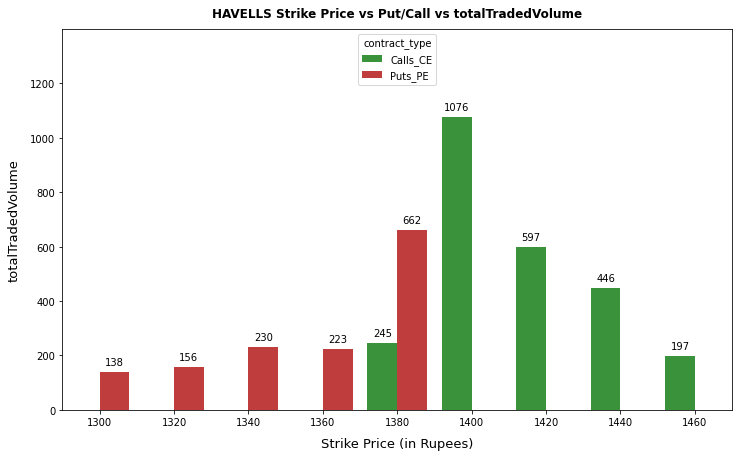

In [6]:
filtered_df = analyse_open_interest('HAVELLS', compare_with='totalTradedVolume', plot_comparison = True) # Read the Doc String. Manually compare other parameters such as openInterest

# [Back Testing](https://www.investopedia.com/terms/b/backtesting.asp)
## Back Testing Stratagies to get the best Win %, Max Return Investment etc
Pass in the parameters dict for all. Check Docstring of each individual function for how a strategy works in buying or selling.

## CCI
`BT.backtest('cci', stocks=['DIVISLAB'])` , for individual stock data performance to tell how much a stock would have gained or lost

In [14]:
cci_parameters = {'buying_thresh':-100, 'selling_thresh':100, 'window':20, 'cols':('OPEN','CLOSE','LOW','HIGH', 'DATE')} # check documentation of BT.cci()

# Using the CCI strategy, Return top gaining stocks which have traded atleast 365 recent days and are currently in nifty-500
BT.backtest('cci', min_days = 365, top_n=45, stocks = 'nifty_500', **cci_parameters)

,win%,wins,losses,ROI,p&l,buy_date,sell_date,buy_price,sell_price,hold_period,buys,sells,days
ALEMBICLTD,1.0,10,0,5.83,"[1.8500000000000014, 2.049999999999997, 3.9500...","[2019-05-06 00:00:00, 2019-08-05 00:00:00, 201...","[2019-06-11 00:00:00, 2019-08-13 00:00:00, 202...","[41.25, 42.95, 53.5, 79.65, 103.7, 101.95, 101...","[43.1, 45.0, 57.45, 94.95, 104.65, 106.0, 114....","[36, 8, 26, 7, 42, 7, 1, 7, 17, 13]",10,10,668
TIINDIA,1.0,7,0,8.74,"[5.699999999999989, 1.8999999999999773, 26.0, ...","[2019-04-24 00:00:00, 2019-06-26 00:00:00, 202...","[2019-05-22 00:00:00, 2019-06-28 00:00:00, 202...","[379.3, 392.1, 504.0, 624.8, 817.0, 1110.0, 11...","[385.0, 394.0, 530.0, 810.0, 837.1, 1274.9, 12...","[28, 2, 7, 64, 21, 11, 7]",8,7,678
BASF,1.0,7,0,6.74,"[14.75, 17.200000000000045, 370.0, 73.40000000...","[2019-05-03 00:00:00, 2020-04-24 00:00:00, 202...","[2019-06-04 00:00:00, 2020-06-05 00:00:00, 202...","[1372.6, 1097.8, 1324.0, 1447.6, 1540.0, 2080....","[1387.35, 1115.0, 1694.0, 1521.0, 1719.7, 2247...","[32, 42, 11, 50, 10, 18, 22]",7,7,676
MFSL,1.0,7,0,5.13,"[17.0, 71.39999999999998, 6.899999999999977, 2...","[2020-01-17 00:00:00, 2020-08-19 00:00:00, 202...","[2020-02-24 00:00:00, 2020-08-26 00:00:00, 202...","[537.9, 548.6, 603.1, 597.0, 709.9, 865.0, 108...","[554.9, 620.0, 610.0, 618.3, 778.0, 925.0, 109...","[38, 7, 10, 22, 9, 30, 31]",7,7,678
MARICO,1.0,7,0,2.95,"[6.25, 12.850000000000023, 1.4499999999999886,...","[2019-09-20 00:00:00, 2019-10-10 00:00:00, 202...","[2019-09-27 00:00:00, 2019-10-24 00:00:00, 202...","[381.85, 382.95, 370.55, 373.0, 414.0, 528.75,...","[388.1, 395.8, 372.0, 392.1, 422.0, 563.95, 56...","[7, 14, 24, 2, 15, 24, 8]",7,7,678
PIDILITIND,1.0,7,0,2.49,"[36.549999999999955, 57.700000000000045, 130.0...","[2019-05-02 00:00:00, 2019-09-23 00:00:00, 202...","[2019-06-07 00:00:00, 2019-09-24 00:00:00, 202...","[1229.0, 1435.0, 1540.1, 1565.05, 1620.0, 1765...","[1265.55, 1492.7, 1670.1, 1567.4, 1626.0, 1770...","[36, 1, 8, 41, 13, 15, 21]",7,7,678
IEX,1.0,6,0,9.50,"[17.100000000000023, 3.8000000000000114, 14.59...","[2020-02-05 00:00:00, 2020-07-30 00:00:00, 202...","[2020-02-18 00:00:00, 2020-08-17 00:00:00, 202...","[170.95, 183.0, 214.35, 335.1, 370.15, 410.0]","[188.05, 186.8, 228.95, 378.75, 373.0, 488.0]","[13, 18, 8, 12, 28, 15]",6,6,677
CYIENT,1.0,6,0,7.76,"[22.5, 41.0, 113.94999999999999, 2.79999999999...","[2020-09-11 00:00:00, 2020-09-28 00:00:00, 202...","[2020-09-16 00:00:00, 2020-10-23 00:00:00, 202...","[393.5, 389.0, 505.45, 655.0, 652.05, 950.0]","[416.0, 430.0, 619.4, 657.8, 660.0, 1036.85]","[5, 25, 4, 6, 12, 25]",6,6,678
AMBUJACEM,1.0,6,0,6.66,"[12.400000000000006, 21.850000000000023, 6.100...","[2019-04-09 00:00:00, 2020-09-11 00:00:00, 202...","[2019-05-28 00:00:00, 2020-10-08 00:00:00, 202...","[225.6, 212.95, 258.9, 263.7, 303.95, 398.0]","[238.0, 234.8, 265.0, 273.0, 326.55, 436.55]","[49, 27, 30, 3, 28, 19]",6,6,678
CANFINHOME,1.0,6,0,6.15,"[13.350000000000023, 37.30000000000001, 27.0, ...","[2019-05-03 00:00:00, 2019-06-20 00:00:00, 201...","[2019-05-21 00:00:00, 2019-07-23 00:00:00, 201...","[341.65, 349.95, 375.0, 386.0, 483.6, 506.1]","[355.0, 387.25, 402.0, 397.15, 495.0, 556.0]","[18, 33, 10, 20, 12, 7]",6,6,678


## MA
Moving Average Strategy

In [13]:
BT.backtest('ma',stocks='nifty_50',top_n=25)

,win%,wins,losses,ROI,p&l,buy_date,sell_date,buy_price,sell_price,hold_period,buys,sells,days
BAJAJFINSV,0.88,7,1,6.59,"[578.4929999999995, 430.2379999999994, 780.0, ...","[2019-02-25 00:00:00, 2019-05-10 00:00:00, 201...","[2019-03-12 00:00:00, 2019-05-17 00:00:00, 201...","[6272.7, 7494.2, 7800.0, 9684.0, 9025.0, 9911....","[6851.192999999999, 7924.437999999999, 8580.0,...","[15, 7, 7, 22, 12, 5, 3, 6]",8,8,678
TATAMOTORS,0.88,7,1,6.20,"[20.29800000000003, 18.974999999999994, 11.143...","[2019-02-25 00:00:00, 2019-04-02 00:00:00, 201...","[2019-03-05 00:00:00, 2019-04-03 00:00:00, 201...","[175.3, 189.75, 163.0, 188.9, 134.4, 138.0, 31...","[195.59800000000004, 208.725, 174.143999999999...","[8, 1, 0, 2, 6, 4, 27, 9]",8,8,677
TITAN,0.69,9,4,3.81,"[-19.100000000000136, 63.18249999999989, 42.78...","[2019-02-21 00:00:00, 2019-03-01 00:00:00, 201...","[2019-02-26 00:00:00, 2019-03-15 00:00:00, 201...","[1044.4, 1033.8, 1105.0, 1110.0, 1126.5, 1191....","[1025.3, 1096.9824999999998, 1147.785, 1193.87...","[5, 14, 13, 6, 4, 20, 8, 6, 8, 11, 34, 15, 11]",13,13,677
TATASTEEL,0.64,7,4,3.31,"[32.238000000000056, -38.75, -38.3499999999999...","[2019-02-20 00:00:00, 2019-04-30 00:00:00, 201...","[2019-03-05 00:00:00, 2019-05-10 00:00:00, 201...","[480.6, 547.75, 512.3, 420.15, 408.0, 663.5, 6...","[512.8380000000001, 509.0, 473.95, 386.5, 444....","[13, 10, 11, 11, 19, 4, 8, 5, 9, 0, 1]",11,11,678
COALINDIA,0.62,5,3,3.63,"[20.497000000000014, 15.721000000000004, -6.94...","[2019-03-01 00:00:00, 2019-05-24 00:00:00, 201...","[2019-04-15 00:00:00, 2019-05-31 00:00:00, 201...","[229.9, 245.0, 257.65, 253.0, 144.25, 138.0, 1...","[250.39700000000002, 260.721, 250.7, 247.1, 15...","[45, 7, 13, 2, 21, 0, 28, 14]",8,8,678
WIPRO,0.62,5,3,2.42,"[-12.800000000000011, 15.920000000000016, 13.7...","[2019-02-21 00:00:00, 2020-09-08 00:00:00, 202...","[2019-03-06 00:00:00, 2020-09-11 00:00:00, 202...","[374.0, 279.5, 348.5, 353.9, 365.7, 436.65, 43...","[361.2, 295.42, 362.23099999999994, 367.431999...","[13, 3, 10, 5, 13, 1, 5, 3]",9,8,678
LT,0.62,5,3,2.01,"[83.57999999999993, -26.850000000000136, -50.8...","[2019-02-28 00:00:00, 2019-04-25 00:00:00, 202...","[2019-03-12 00:00:00, 2019-05-13 00:00:00, 202...","[1295.0, 1363.45, 1486.0, 1423.9, 1422.0, 1469...","[1378.58, 1336.6, 1435.15, 1374.05, 1529.062, ...","[12, 18, 15, 0, 16, 3, 3, 7]",9,8,678
TATACONSUM,0.61,11,7,2.87,"[12.536999999999978, 10.845500000000044, -11.2...","[2019-03-05 00:00:00, 2019-03-29 00:00:00, 201...","[2019-03-14 00:00:00, 2019-04-02 00:00:00, 201...","[197.85, 200.55, 211.95, 223.0, 261.0, 273.2, ...","[210.38699999999997, 211.39550000000006, 200.6...","[9, 4, 12, 14, 2, 14, 18, 37, 0, 25, 4, 11, 7,...",18,18,677
INFY,0.58,7,5,2.28,"[-34.89999999999998, -20.40000000000009, -17.6...","[2019-03-22 00:00:00, 2019-06-03 00:00:00, 201...","[2019-05-14 00:00:00, 2019-07-05 00:00:00, 201...","[742.3, 742.95, 779.9, 724.5, 926.4, 1144.8, 1...","[707.4, 722.55, 762.25, 788.976, 954.856999999...","[53, 32, 8, 13, 12, 3, 21, 36, 17, 26, 1, 21]",12,12,678
GRASIM,0.57,4,3,3.11,"[73.53050000000007, -15.950000000000045, -79.7...","[2019-02-25 00:00:00, 2019-05-10 00:00:00, 201...","[2019-03-12 00:00:00, 2019-05-10 00:00:00, 201...","[762.0, 873.0, 894.0, 712.2, 1407.4, 1537.25, ...","[835.5305000000001, 857.05, 814.3, 785.2330000...","[15, 0, 69, 23, 71, 12, 16]",7,7,678


## RSI

In [15]:
BT.backtest('rsi',stocks='nifty_500', top_n = 30) 

,win%,wins,losses,ROI,p&l,buy_date,sell_date,buy_price,sell_price,hold_period,buys,sells,days
EPL,1.0,2,0,42.49,"[24.80000000000001, 98.30000000000001]","[2019-08-07 00:00:00, 2020-03-04 00:00:00, 202...","[2019-11-22 00:00:00, 2020-08-05 00:00:00]","[128.2, 161.5, 254.0]","[153.0, 259.8]","[107, 154]",3,2,678
ALKYLAMINE,1.0,2,0,41.71,"[17.399999999999977, 783.0]","[2019-08-07 00:00:00, 2020-03-23 00:00:00]","[2019-09-25 00:00:00, 2020-04-29 00:00:00]","[809.0, 1110.0]","[826.4, 1893.0]","[49, 37]",2,2,678
GMMPFAUDLR,1.0,2,0,33.26,"[1750.0, 242.10000000000036]","[2020-03-23 00:00:00, 2020-10-01 00:00:00, 202...","[2020-04-27 00:00:00, 2021-02-22 00:00:00]","[1890.0, 4099.0, 4239.4]","[3640.0, 4341.1]","[35, 144]",3,2,678
EIHOTEL,1.0,2,0,29.79,"[21.099999999999994, 37.0]","[2021-04-15 00:00:00, 2021-08-13 00:00:00]","[2021-06-01 00:00:00, 2021-09-28 00:00:00]","[89.0, 106.0]","[110.1, 143.0]","[47, 46]",2,2,678
DIVISLAB,1.0,2,0,29.66,"[1264.3999999999999, 342.0]","[2020-03-20 00:00:00, 2021-02-02 00:00:00]","[2020-08-11 00:00:00, 2021-04-29 00:00:00]","[1875.55, 3540.0]","[3139.95, 3882.0]","[144, 86]",2,2,678
ALKEM,1.0,2,0,28.03,"[1038.7, 244.05000000000018]","[2020-03-23 00:00:00, 2020-10-28 00:00:00]","[2020-08-05 00:00:00, 2020-12-09 00:00:00]","[1881.3, 2694.95]","[2920.0, 2939.0]","[135, 42]",2,2,678
BSE,1.0,2,0,26.05,"[70.0, 203.29999999999995]","[2020-11-06 00:00:00, 2021-03-30 00:00:00]","[2020-11-25 00:00:00, 2021-05-17 00:00:00]","[495.0, 554.0]","[565.0, 757.3]","[19, 48]",2,2,677
ATUL,1.0,2,0,24.61,"[170.69999999999982, 1600.0500000000002]","[2019-07-15 00:00:00, 2020-03-23 00:00:00]","[2019-09-27 00:00:00, 2020-08-04 00:00:00]","[3745.65, 3450.0]","[3916.35, 5050.05]","[74, 134]",2,2,678
BERGEPAINT,1.0,2,0,22.42,"[146.0, 107.55000000000007]","[2020-03-23 00:00:00, 2021-03-02 00:00:00, 202...","[2020-08-11 00:00:00, 2021-05-27 00:00:00]","[406.0, 724.8, 789.35]","[552.0, 832.35]","[141, 86]",3,2,678
TORNTPHARM,1.0,2,0,19.98,"[669.0, 181.94999999999982]","[2020-03-23 00:00:00, 2020-11-12 00:00:00]","[2020-04-15 00:00:00, 2021-05-12 00:00:00]","[1707.0, 2552.0]","[2376.0, 2733.95]","[23, 181]",2,2,678


## MACD

In [ ]:
BT.backtest('macd', top_n=5, stocks=['BAJFINANCE','SHREECEM',"COALINDIA"]) # Individual stocks. If no sells have been made, it'll be empty

## Stochastic Oscillator
Faster signal than MACD. Pass in the paramerters to change results and modify to your ease

In [ ]:
BT.backtest('stochastic_osc',stocks='nifty_500', top_n = 15) 

# [Risk Management](https://www.youtube.com/watch?v=v3lfIdpKSiU)

You have a total budget of 40K, and a risk apetite of rs 400 per trade, You can set manual such as `entry = 3980.1` and `stop_loss=3780.5`. If intraday, set `leverage` parameter to `>1` 

In [5]:
In.get_particulars('NIITLTD',budget = 40000, risk = 400,)  #manually set parameters for entry, exit etc

{'Buying Price': 394.29,
 'Stop-Loss %': 7.52,
 'Target %': 15.04,
 'Quantity': 13.0,
 'Stop-Loss Price': 364.635,
 'Trigger Price': 453.61,
 'investment_required': 5125.820699999999,
 'Risk Per Share': 29.66,
 'Profit Per Share': 59.32,
 'Max loss on this config': 385.57,
 'Max Gain on this config': 771.13,
 'Index': []}